In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pickle
from scipy import sparse
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gacuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gacuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
train_profiles = pd.read_csv("data/X_train.csv")
test_profiles = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")

In [30]:
y_train.head()

,Unnamed: 0,label
0,158,0
1,137,0
2,98,1
3,159,0
4,38,1


In [4]:
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]
    text_no_stopwords = " ".join(tokens_wo_stopwords)
    return text_no_stopwords

In [5]:
train_texts = train_profiles["Text"]
train_texts_no_stopwords = []
for text in train_texts:
    train_texts_no_stopwords.append(remove_stopwords(text))

In [6]:
test_texts = test_profiles["Text"]
test_texts_no_stopwords = []
for text in test_texts:
    test_texts_no_stopwords.append(remove_stopwords(text))

In [13]:
corpus = train_texts_no_stopwords
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
train_profiles_features = vectorizer.transform(train_texts_no_stopwords)
test_profiles_features = vectorizer.transform(test_texts_no_stopwords)

In [18]:
svd = TruncatedSVD(n_components=2)
svd_mdl = svd.fit_transform(train_profiles_features)

In [49]:
#svd_mdl
V_plot = pd.DataFrame()
V_plot["X"] = svd_mdl[:,0]
V_plot["Y"] = svd_mdl[:,1]
V_plot["label"] = y_train["label"]

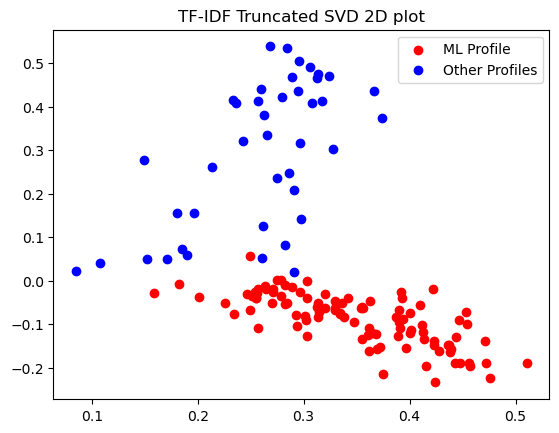

In [51]:
plt.scatter(V_plot[V_plot["label"]==1]["X"], V_plot[V_plot["label"]==1]["Y"], c="red", label="ML Profile")
plt.scatter(V_plot[V_plot["label"]==0]["X"], V_plot[V_plot["label"]==0]["Y"], c="blue", label="Other Profiles")
plt.title("TF-IDF Truncated SVD 2D plot")
plt.legend()

In [ ]:
sparse.save_npz("data/train_profiles_features.npz", train_profiles_features)
sparse.save_npz("data/test_profiles_features.npz", test_profiles_features)

In [ ]:
pickle.dump(tfidf, open("data/tfidf.pickle", "wb"))
pickle.dump(train_profiles_features, open("data/train_profiles_features.pickle", "wb"))
pickle.dump(test_profiles_features, open("data/test_profiles_features.pickle", "wb"))